In [1]:
%run -i helper_functions.py

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import yfinance as yf
#from helper_functions import *
from dotenv import load_dotenv
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()
eia_api_key = os.getenv("EIA_API_KEY")

# dates to get data 
#end_date = date.today()
#start_date = end_date -  relativedelta(years=11)
#start_date

start_date = "2010-01-01"
end_date = "2014-12-30"

In [3]:
# Reading Temperature data and convert it to dataframe
#Data cleanup
# Reading whale returns
df_weather = Path(r"C:\Users\6zzzz\OneDrive\Documents\GitHub\Project-1\Data\Pittsburg_Area_Temp_2010-2014.csv")
df_weather_data = pd.read_csv(df_weather)
df_weather_data.head()





,Date,Maximum,Minimum,Average,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
0,1/1/2010,34,20,27.0,-1.9,38,0,0.02,0.4,1
1,1/2/2010,20,8,14.0,-14.7,51,0,0.04,0.7,1
2,1/3/2010,18,6,12.0,-16.7,53,0,T,T,1
3,1/4/2010,23,16,19.5,-9.1,45,0,0.06,1.5,1
4,1/5/2010,24,19,21.5,-7.0,43,0,0.07,2,2


In [5]:
# Reading Natural gas data and convert it to dataframe
#Data cleanup
#describe()

ng_df_historic = yf.Ticker("NG=F")
#df_historic = df_historic.drop(["Open", "High", "Low", "Volume", "Dividends", "Stock Splits" ], axis=1)
ng_df_historic_data = ng_df_historic.history(start=start_date , end= end_date)
ng_df_historic_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04,5.705,5.894,5.705,5.884,78858,0,0
2010-01-05,5.837,5.858,5.615,5.637,99492,0,0
2010-01-06,5.690,6.075,5.650,6.009,140611,0,0
2010-01-07,6.033,6.108,5.763,5.806,135113,0,0
2010-01-08,5.827,5.853,5.621,5.749,101153,0,0


In [6]:
#Return close prices of Natural gas and Average temp 



In [7]:
#join close price of natural gas and Average temprature using concatenation

df = pd.concat([df_weather_data, ng_df_historic_data], join="inner", axis='columns' ).dropna()
#display(df.isnull().sum())
df.head()

,Date,Maximum,Minimum,Average,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth,Open,High,Low,Close,Volume,Dividends,Stock Splits


In [8]:
#Return close prices of Natural gas and Average temp 
ng_df_historic_data_close = ng_df_historic_data['Close']

df_weather_data_Average = df_weather_data['Average']



ValueError: x and y must have same first dimension, but have shapes (1826,) and (1246,)

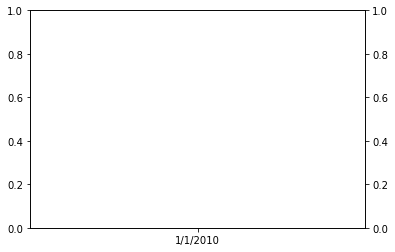

In [9]:
#Plot close prices of Natural gas and Average temp 

x = df_weather_data['Date']

fig, ng_df_historic_data_close_plot = plt.subplots()

df_weather_data_Average_plot = ng_df_historic_data_close_plot.twinx()
ng_df_historic_data_close_plot.plot(x,ng_df_historic_data_close, 'g-' )
df_weather_data_Average_plot.plot(x,df_weather_data_Average, 'b-' )

#df_weather_data_Average_plot.plot()


plt.show()

#import numpy as np
#import matplotlib.pyplot as plt
#x = np.arange(0, 10, 0.1)
#y1 = 0.05 * x**2
#y2 = -1 *y1

#fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
#ax1.plot(x, y1, 'g-')
#ax2.plot(x, y2, 'b-')

#ax1.set_xlabel('X data')
#ax1.set_ylabel('Y1 data', color='g')
#ax2.set_ylabel('Y2 data', color='b')

#plt.show()

In [ ]:

#Find daily return of the two joined data frame

df_return = df.pct_change().dropna()
df_return_close_average = df_return[['Close', 'Average']].head()
df_return_close_average
# Drop nulls
# Count nulls



In [11]:
#plot daily return of the close price of naturan gas and temprature
#print out any similarities and differences between them
## Box plot to visually show risk

#plot daily return of the close price of naturan gas and average temprature
plot_temp_Average_return = plt.plot(df_return_close_average['Average'])
plot_Ng_close_return = plt.plot(df_return_close_average['Close'])

#print out any similarities and differences between them
## Box plot to visually show risk

NameError: name 'df_return_close_average' is not defined

In [ ]:
# Calculate the daily standard deviations
df_return_close_average_std = df_return_close_average.std()
# Calculate the annualized standard deviation (252 trading days)
df_return_close_average_std = df_return_close_average.std()*np.sqrt(252)


In [ ]:
# Calculate rolling standard deviation for 21 days
plot_temp_Average_return_rol_std = df_return_close_average.rolling(window=21).std
# Plot rolling standard deviation
plot_temp_Average_return_rol_std.plot()


In [ ]:
# Calculate and plot the correlation
df_return_close_corr = df_return_close_average.corr()
#display correlation matrix


In [ ]:
# explation the correlation between Temp and Price of Natural gas


In [ ]:
%run -i helper_functions.py